In [3]:
%matplotlib inline
from notebook_init import *
import time
from tqdm import tqdm

out_root = Path('out/consistency')
makedirs(out_root, exist_ok=True)
# rand = lambda : np.random.randint(np.iinfo(np.int32).max)

In [4]:
use_w = True
inst = get_instrumented_model('StyleGAN2', 'ffhq', 'style', device, inst=inst, use_w=use_w)
model = inst.model
model.truncation = 1.0

Loading ../models/checkpoints/stylegan2/stylegan2_ffhq_1024.pt


In [5]:
#Load directions
gs_dir = np.load('./global_directions/ganspace_directions_ffhq.npy')#Note! Only ffhq is provided.
gs_dir = torch.from_numpy(gs_dir).to(device)
sf_dir = np.load('./global_directions/sefa_directions_ffhq.npy')#Note! Only ffhq is provided.
sf_dir = torch.from_numpy(sf_dir).to(device)
class compare_basis_config:
    n_samples = 50
    seed = 0
    subspace_dim = 2

In [6]:
torch.autograd.set_grad_enabled(True)
eval_config = compare_basis_config()

## Grassmannain Metric between two random O(n)

Evaluated dim 1


100%|██████████| 100/100 [01:29<00:00,  1.11it/s]


Evaluated dim 2


100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


Evaluated dim 3


100%|██████████| 100/100 [01:30<00:00,  1.11it/s]


Evaluated dim 4


100%|██████████| 100/100 [01:29<00:00,  1.11it/s]


Evaluated dim 5


100%|██████████| 100/100 [01:30<00:00,  1.11it/s]


Evaluated dim 6


100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


Evaluated dim 7


100%|██████████| 100/100 [01:30<00:00,  1.11it/s]


Evaluated dim 8


100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


Evaluated dim 9


100%|██████████| 100/100 [01:29<00:00,  1.11it/s]


Evaluated dim 10


100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


Evaluated dim 11


100%|██████████| 100/100 [01:30<00:00,  1.11it/s]


Evaluated dim 12


100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


Evaluated dim 13


100%|██████████| 100/100 [01:28<00:00,  1.14it/s]


Evaluated dim 14


100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


Evaluated dim 15


100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


Evaluated dim 16


100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


Evaluated dim 17


100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


Evaluated dim 18


100%|██████████| 100/100 [01:29<00:00,  1.11it/s]


Evaluated dim 19


100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


Evaluated dim 20


100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


Evaluated dim 21


100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


Evaluated dim 22


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


Evaluated dim 23


100%|██████████| 100/100 [01:26<00:00,  1.16it/s]


Evaluated dim 24


100%|██████████| 100/100 [01:32<00:00,  1.09it/s]


Evaluated dim 25


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


Evaluated dim 26


100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


Evaluated dim 27


100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


Evaluated dim 28


100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


Evaluated dim 29


100%|██████████| 100/100 [01:25<00:00,  1.17it/s]


Evaluated dim 30


100%|██████████| 100/100 [01:26<00:00,  1.15it/s]


Evaluated dim 31


100%|██████████| 100/100 [01:26<00:00,  1.16it/s]


Evaluated dim 32


100%|██████████| 100/100 [01:26<00:00,  1.15it/s]


Evaluated dim 33


100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


Evaluated dim 34


100%|██████████| 100/100 [01:30<00:00,  1.11it/s]


Evaluated dim 35


100%|██████████| 100/100 [01:26<00:00,  1.16it/s]


Evaluated dim 36


100%|██████████| 100/100 [01:27<00:00,  1.15it/s]


Evaluated dim 37


100%|██████████| 100/100 [01:25<00:00,  1.17it/s]


Evaluated dim 38


100%|██████████| 100/100 [01:25<00:00,  1.17it/s]


Evaluated dim 39


100%|██████████| 100/100 [01:25<00:00,  1.16it/s]


Evaluated dim 40


100%|██████████| 100/100 [01:26<00:00,  1.16it/s]


Evaluated dim 41


100%|██████████| 100/100 [01:25<00:00,  1.16it/s]


Evaluated dim 42


100%|██████████| 100/100 [01:25<00:00,  1.16it/s]


Evaluated dim 43


100%|██████████| 100/100 [01:28<00:00,  1.14it/s]


Evaluated dim 44


100%|██████████| 100/100 [01:27<00:00,  1.15it/s]


Evaluated dim 45


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


Evaluated dim 46


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


Evaluated dim 47


100%|██████████| 100/100 [01:28<00:00,  1.14it/s]


Evaluated dim 48


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


Evaluated dim 49


100%|██████████| 100/100 [01:27<00:00,  1.15it/s]


Evaluated dim 50


100%|██████████| 100/100 [01:26<00:00,  1.16it/s]


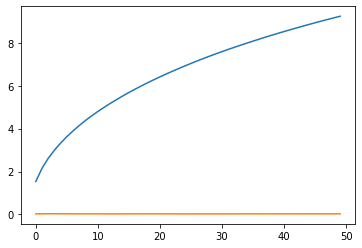

Evaluated dim 1


100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


Evaluated dim 2


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


Evaluated dim 3


100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


Evaluated dim 4


100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


Evaluated dim 5


100%|██████████| 100/100 [01:33<00:00,  1.07it/s]


Evaluated dim 6


100%|██████████| 100/100 [01:31<00:00,  1.10it/s]


Evaluated dim 7


100%|██████████| 100/100 [01:31<00:00,  1.10it/s]


Evaluated dim 8


100%|██████████| 100/100 [01:32<00:00,  1.09it/s]


Evaluated dim 9


100%|██████████| 100/100 [01:31<00:00,  1.10it/s]


Evaluated dim 10


100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


Evaluated dim 11


100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


Evaluated dim 12


100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


Evaluated dim 13


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


Evaluated dim 14


100%|██████████| 100/100 [01:31<00:00,  1.10it/s]


Evaluated dim 15


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


Evaluated dim 16


100%|██████████| 100/100 [01:29<00:00,  1.11it/s]


Evaluated dim 17


100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


Evaluated dim 18


100%|██████████| 100/100 [01:28<00:00,  1.12it/s]


Evaluated dim 19


100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


Evaluated dim 20


100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


Evaluated dim 21


100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


Evaluated dim 22


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


Evaluated dim 23


100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


Evaluated dim 24


100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


Evaluated dim 25


100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


Evaluated dim 26


100%|██████████| 100/100 [01:31<00:00,  1.10it/s]


Evaluated dim 27


100%|██████████| 100/100 [01:33<00:00,  1.07it/s]


Evaluated dim 28


100%|██████████| 100/100 [01:36<00:00,  1.04it/s]


Evaluated dim 29


100%|██████████| 100/100 [01:40<00:00,  1.01s/it]


Evaluated dim 30


100%|██████████| 100/100 [01:37<00:00,  1.02it/s]


Evaluated dim 31


100%|██████████| 100/100 [01:39<00:00,  1.01it/s]


Evaluated dim 32


100%|██████████| 100/100 [01:40<00:00,  1.01s/it]


Evaluated dim 33


100%|██████████| 100/100 [01:33<00:00,  1.07it/s]


Evaluated dim 34


100%|██████████| 100/100 [01:39<00:00,  1.00it/s]


Evaluated dim 35


100%|██████████| 100/100 [01:38<00:00,  1.01it/s]


Evaluated dim 36


100%|██████████| 100/100 [01:39<00:00,  1.01it/s]


Evaluated dim 37


100%|██████████| 100/100 [01:38<00:00,  1.01it/s]


Evaluated dim 38


100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


Evaluated dim 39


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


Evaluated dim 40


100%|██████████| 100/100 [01:40<00:00,  1.01s/it]


Evaluated dim 41


100%|██████████| 100/100 [01:38<00:00,  1.01it/s]


Evaluated dim 42


100%|██████████| 100/100 [01:31<00:00,  1.10it/s]


Evaluated dim 43


100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


Evaluated dim 44


100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


Evaluated dim 45


100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


Evaluated dim 46


100%|██████████| 100/100 [01:36<00:00,  1.03it/s]


Evaluated dim 47


100%|██████████| 100/100 [01:36<00:00,  1.04it/s]


Evaluated dim 48


100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


Evaluated dim 49


100%|██████████| 100/100 [01:30<00:00,  1.11it/s]


Evaluated dim 50


100%|██████████| 100/100 [01:33<00:00,  1.07it/s]


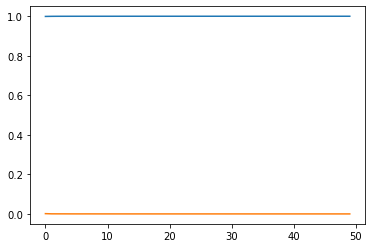

In [7]:
eval_config.n_samples = 100

for metric_type in ['geodesic', 'proj']:
    '''
    Grassmannain Metric between two Random Orthogonal Matrix
    '''
    consistency_list = []
    time_list = []

    for dim in range(1, 51):
        print(f'Evaluated dim {dim}')
        time.sleep(0.2)
        eval_config.subspace_dim = dim

        timer = time.time()
        consistency = evaluate_random_basis_consistency(model, eval_config, metric_type = metric_type)
        consistency_list.append(consistency)
        time_list.append(round(time.time() - timer, 2))

    plt.plot(consistency_list)
    plt.savefig(f'./out/consistency/consistency_o(n)_metric_{metric_type}_n_{eval_config.n_samples}.png')
    plt.show()

    with open(f'./out/consistency/consistency_o(n)_metric_{metric_type}_n_{eval_config.n_samples}.dill', 'wb') as f:
        pickle.dump(consistency_list, f)

## Grassmannain Metric between two Random w

Evaluated dim 1


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 2


100%|██████████| 1000/1000 [01:27<00:00, 11.39it/s]


Evaluated dim 3


100%|██████████| 1000/1000 [01:28<00:00, 11.24it/s]


Evaluated dim 4


100%|██████████| 1000/1000 [01:28<00:00, 11.30it/s]


Evaluated dim 5


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 6


100%|██████████| 1000/1000 [01:27<00:00, 11.37it/s]


Evaluated dim 7


100%|██████████| 1000/1000 [01:25<00:00, 11.73it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [01:27<00:00, 11.42it/s]


Evaluated dim 9


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 10


100%|██████████| 1000/1000 [01:27<00:00, 11.45it/s]


Evaluated dim 11


100%|██████████| 1000/1000 [01:22<00:00, 12.08it/s]


Evaluated dim 12


100%|██████████| 1000/1000 [01:23<00:00, 11.96it/s]


Evaluated dim 13


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 14


100%|██████████| 1000/1000 [01:24<00:00, 11.87it/s]


Evaluated dim 15


100%|██████████| 1000/1000 [01:29<00:00, 11.20it/s]


Evaluated dim 16


100%|██████████| 1000/1000 [01:28<00:00, 11.28it/s]


Evaluated dim 17


100%|██████████| 1000/1000 [01:26<00:00, 11.60it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [01:25<00:00, 11.67it/s]


Evaluated dim 19


100%|██████████| 1000/1000 [01:23<00:00, 11.92it/s]


Evaluated dim 20


100%|██████████| 1000/1000 [01:27<00:00, 11.43it/s]


Evaluated dim 21


100%|██████████| 1000/1000 [01:29<00:00, 11.22it/s]


Evaluated dim 22


100%|██████████| 1000/1000 [01:29<00:00, 11.18it/s]


Evaluated dim 23


100%|██████████| 1000/1000 [01:27<00:00, 11.42it/s]


Evaluated dim 24


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 25


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 26


100%|██████████| 1000/1000 [01:26<00:00, 11.55it/s]


Evaluated dim 27


100%|██████████| 1000/1000 [01:28<00:00, 11.24it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:27<00:00, 11.39it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [01:26<00:00, 11.58it/s]


Evaluated dim 30


100%|██████████| 1000/1000 [01:26<00:00, 11.51it/s]


Evaluated dim 31


100%|██████████| 1000/1000 [01:25<00:00, 11.66it/s]


Evaluated dim 32


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 33


100%|██████████| 1000/1000 [01:27<00:00, 11.45it/s]


Evaluated dim 34


100%|██████████| 1000/1000 [01:26<00:00, 11.62it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [01:27<00:00, 11.44it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [01:28<00:00, 11.34it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:26<00:00, 11.60it/s]


Evaluated dim 38


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 39


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 40


100%|██████████| 1000/1000 [01:30<00:00, 11.08it/s]


Evaluated dim 41


100%|██████████| 1000/1000 [01:28<00:00, 11.33it/s]


Evaluated dim 42


100%|██████████| 1000/1000 [01:26<00:00, 11.57it/s]


Evaluated dim 43


100%|██████████| 1000/1000 [01:27<00:00, 11.48it/s]


Evaluated dim 44


100%|██████████| 1000/1000 [01:26<00:00, 11.61it/s]


Evaluated dim 45


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 46


100%|██████████| 1000/1000 [01:26<00:00, 11.52it/s]


Evaluated dim 47


100%|██████████| 1000/1000 [01:25<00:00, 11.72it/s]


Evaluated dim 48


100%|██████████| 1000/1000 [01:28<00:00, 11.24it/s]


Evaluated dim 49


100%|██████████| 1000/1000 [01:28<00:00, 11.30it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [01:24<00:00, 11.85it/s]


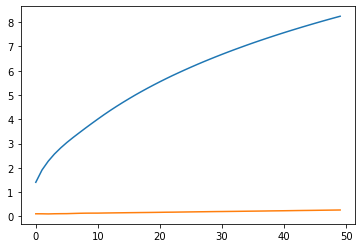

Evaluated dim 1


100%|██████████| 1000/1000 [01:57<00:00,  8.48it/s]


Evaluated dim 2


100%|██████████| 1000/1000 [01:58<00:00,  8.43it/s]


Evaluated dim 3


100%|██████████| 1000/1000 [01:55<00:00,  8.65it/s]


Evaluated dim 4


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 5


100%|██████████| 1000/1000 [01:57<00:00,  8.53it/s]


Evaluated dim 6


100%|██████████| 1000/1000 [01:59<00:00,  8.35it/s]


Evaluated dim 7


100%|██████████| 1000/1000 [01:57<00:00,  8.54it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [01:55<00:00,  8.65it/s]


Evaluated dim 9


100%|██████████| 1000/1000 [01:59<00:00,  8.40it/s]


Evaluated dim 10


100%|██████████| 1000/1000 [01:59<00:00,  8.39it/s]


Evaluated dim 11


100%|██████████| 1000/1000 [01:59<00:00,  8.39it/s]


Evaluated dim 12


100%|██████████| 1000/1000 [01:56<00:00,  8.55it/s]


Evaluated dim 13


100%|██████████| 1000/1000 [01:57<00:00,  8.51it/s]


Evaluated dim 14


100%|██████████| 1000/1000 [01:57<00:00,  8.53it/s]


Evaluated dim 15


100%|██████████| 1000/1000 [02:00<00:00,  8.31it/s]


Evaluated dim 16


100%|██████████| 1000/1000 [01:56<00:00,  8.58it/s]


Evaluated dim 17


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 18


100%|██████████| 1000/1000 [01:56<00:00,  8.56it/s]


Evaluated dim 19


100%|██████████| 1000/1000 [01:55<00:00,  8.69it/s]


Evaluated dim 20


100%|██████████| 1000/1000 [01:59<00:00,  8.38it/s]


Evaluated dim 21


100%|██████████| 1000/1000 [01:54<00:00,  8.70it/s]


Evaluated dim 22


100%|██████████| 1000/1000 [01:55<00:00,  8.68it/s]


Evaluated dim 23


100%|██████████| 1000/1000 [01:56<00:00,  8.62it/s]


Evaluated dim 24


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 25


100%|██████████| 1000/1000 [01:57<00:00,  8.53it/s]


Evaluated dim 26


100%|██████████| 1000/1000 [01:53<00:00,  8.80it/s]


Evaluated dim 27


100%|██████████| 1000/1000 [01:57<00:00,  8.54it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:55<00:00,  8.69it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [01:57<00:00,  8.50it/s]


Evaluated dim 30


100%|██████████| 1000/1000 [01:57<00:00,  8.54it/s]


Evaluated dim 31


100%|██████████| 1000/1000 [01:57<00:00,  8.50it/s]


Evaluated dim 32


100%|██████████| 1000/1000 [01:50<00:00,  9.02it/s]


Evaluated dim 33


100%|██████████| 1000/1000 [01:54<00:00,  8.75it/s]


Evaluated dim 34


100%|██████████| 1000/1000 [01:57<00:00,  8.49it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [01:57<00:00,  8.51it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [01:57<00:00,  8.51it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:58<00:00,  8.47it/s]


Evaluated dim 38


100%|██████████| 1000/1000 [01:56<00:00,  8.58it/s]


Evaluated dim 39


100%|██████████| 1000/1000 [01:51<00:00,  8.98it/s]


Evaluated dim 40


100%|██████████| 1000/1000 [01:54<00:00,  8.73it/s]


Evaluated dim 41


100%|██████████| 1000/1000 [01:54<00:00,  8.76it/s]


Evaluated dim 42


100%|██████████| 1000/1000 [01:55<00:00,  8.66it/s]


Evaluated dim 43


100%|██████████| 1000/1000 [01:50<00:00,  9.04it/s]


Evaluated dim 44


100%|██████████| 1000/1000 [01:54<00:00,  8.71it/s]


Evaluated dim 45


100%|██████████| 1000/1000 [01:56<00:00,  8.55it/s]


Evaluated dim 46


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 47


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 48


100%|██████████| 1000/1000 [01:50<00:00,  9.02it/s]


Evaluated dim 49


100%|██████████| 1000/1000 [01:58<00:00,  8.47it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [01:51<00:00,  8.93it/s]


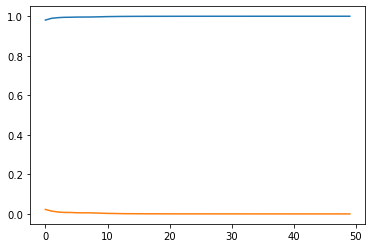

In [8]:
eval_config.n_samples = 1000

for metric_type in ['geodesic', 'proj']:
    '''
    Grassmannain Metric between two Random w
    '''
    consistency_list = []
    time_list = []
    for dim in range(1, 51):
        print(f'Evaluated dim {dim}')
        time.sleep(0.2)
        eval_config.subspace_dim = dim

        timer = time.time()
        consistency = evaluate_basis_consistency(model, eval_config, metric_type = metric_type)
        consistency_list.append(consistency)
        time_list.append(round(time.time() - timer, 2))

    plt.plot(consistency_list)
    plt.savefig(f'./out/consistency/consistency_random_metric_{metric_type}_n_{eval_config.n_samples}.png')
    plt.show()
    
    with open(f'./out/consistency/consistency_random_metric_{metric_type}_n_{eval_config.n_samples}.dill', 'wb') as f:
        pickle.dump(consistency_list, f)
    

## Grassmannain Metric between two Close w

  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 1


100%|██████████| 1000/1000 [01:23<00:00, 11.91it/s]


Evaluated dim 2


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 3


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 4


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 5


100%|██████████| 1000/1000 [01:26<00:00, 11.50it/s]


Evaluated dim 6


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 7


100%|██████████| 1000/1000 [01:26<00:00, 11.55it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [01:25<00:00, 11.72it/s]


Evaluated dim 9


100%|██████████| 1000/1000 [01:28<00:00, 11.36it/s]


Evaluated dim 10


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 11


100%|██████████| 1000/1000 [01:26<00:00, 11.56it/s]


Evaluated dim 12


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 13


100%|██████████| 1000/1000 [01:25<00:00, 11.70it/s]


Evaluated dim 14


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 15


100%|██████████| 1000/1000 [01:26<00:00, 11.56it/s]


Evaluated dim 16


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 17


100%|██████████| 1000/1000 [01:25<00:00, 11.75it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [01:25<00:00, 11.72it/s]


Evaluated dim 19


100%|██████████| 1000/1000 [01:25<00:00, 11.76it/s]


Evaluated dim 20


100%|██████████| 1000/1000 [01:23<00:00, 11.92it/s]


Evaluated dim 21


100%|██████████| 1000/1000 [01:25<00:00, 11.74it/s]


Evaluated dim 22


100%|██████████| 1000/1000 [01:26<00:00, 11.55it/s]


Evaluated dim 23


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 24


100%|██████████| 1000/1000 [01:21<00:00, 12.20it/s]


Evaluated dim 25


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 26


100%|██████████| 1000/1000 [01:23<00:00, 11.93it/s]


Evaluated dim 27


100%|██████████| 1000/1000 [01:21<00:00, 12.27it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:24<00:00, 11.83it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [01:25<00:00, 11.72it/s]


Evaluated dim 30


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 31


100%|██████████| 1000/1000 [01:23<00:00, 11.92it/s]


Evaluated dim 32


100%|██████████| 1000/1000 [01:30<00:00, 11.08it/s]


Evaluated dim 33


100%|██████████| 1000/1000 [01:30<00:00, 11.10it/s]


Evaluated dim 34


100%|██████████| 1000/1000 [01:27<00:00, 11.45it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [01:37<00:00, 10.24it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [01:34<00:00, 10.59it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:37<00:00, 10.27it/s]


Evaluated dim 38


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 39


100%|██████████| 1000/1000 [01:37<00:00, 10.21it/s]


Evaluated dim 40


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 41


100%|██████████| 1000/1000 [01:26<00:00, 11.52it/s]


Evaluated dim 42


100%|██████████| 1000/1000 [01:26<00:00, 11.57it/s]


Evaluated dim 43


100%|██████████| 1000/1000 [01:27<00:00, 11.44it/s]


Evaluated dim 44


100%|██████████| 1000/1000 [01:29<00:00, 11.12it/s]


Evaluated dim 45


100%|██████████| 1000/1000 [01:27<00:00, 11.45it/s]


Evaluated dim 46


100%|██████████| 1000/1000 [01:25<00:00, 11.69it/s]


Evaluated dim 47


100%|██████████| 1000/1000 [01:25<00:00, 11.64it/s]


Evaluated dim 48


100%|██████████| 1000/1000 [01:25<00:00, 11.75it/s]


Evaluated dim 49


100%|██████████| 1000/1000 [01:26<00:00, 11.55it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [01:28<00:00, 11.36it/s]


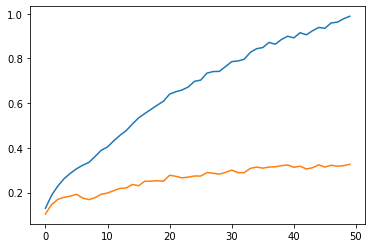

Evaluated dim 1


100%|██████████| 1000/1000 [01:53<00:00,  8.84it/s]


Evaluated dim 2


100%|██████████| 1000/1000 [01:54<00:00,  8.74it/s]


Evaluated dim 3


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 4


100%|██████████| 1000/1000 [01:52<00:00,  8.87it/s]


Evaluated dim 5


100%|██████████| 1000/1000 [01:54<00:00,  8.75it/s]


Evaluated dim 6


100%|██████████| 1000/1000 [01:55<00:00,  8.68it/s]


Evaluated dim 7


100%|██████████| 1000/1000 [01:54<00:00,  8.76it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 9


100%|██████████| 1000/1000 [01:55<00:00,  8.66it/s]


Evaluated dim 10


100%|██████████| 1000/1000 [01:54<00:00,  8.76it/s]


Evaluated dim 11


100%|██████████| 1000/1000 [01:53<00:00,  8.80it/s]


Evaluated dim 12


100%|██████████| 1000/1000 [01:53<00:00,  8.80it/s]


Evaluated dim 13


100%|██████████| 1000/1000 [01:51<00:00,  8.98it/s]


Evaluated dim 14


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 15


100%|██████████| 1000/1000 [01:53<00:00,  8.80it/s]


Evaluated dim 16


100%|██████████| 1000/1000 [01:51<00:00,  8.97it/s]


Evaluated dim 17


100%|██████████| 1000/1000 [01:53<00:00,  8.79it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 19


100%|██████████| 1000/1000 [01:54<00:00,  8.74it/s]


Evaluated dim 20


100%|██████████| 1000/1000 [01:54<00:00,  8.74it/s]


Evaluated dim 21


100%|██████████| 1000/1000 [01:51<00:00,  8.99it/s]


Evaluated dim 22


100%|██████████| 1000/1000 [01:49<00:00,  9.10it/s]


Evaluated dim 23


100%|██████████| 1000/1000 [01:50<00:00,  9.01it/s]


Evaluated dim 24


100%|██████████| 1000/1000 [01:50<00:00,  9.06it/s]


Evaluated dim 25


100%|██████████| 1000/1000 [01:50<00:00,  9.01it/s]


Evaluated dim 26


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 27


100%|██████████| 1000/1000 [01:54<00:00,  8.72it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:56<00:00,  8.62it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [01:59<00:00,  8.39it/s]


Evaluated dim 30


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 31


100%|██████████| 1000/1000 [01:59<00:00,  8.40it/s]


Evaluated dim 32


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 33


100%|██████████| 1000/1000 [02:12<00:00,  7.57it/s]


Evaluated dim 34


100%|██████████| 1000/1000 [02:07<00:00,  7.84it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [01:58<00:00,  8.47it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [01:54<00:00,  8.76it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:55<00:00,  8.69it/s]


Evaluated dim 38


100%|██████████| 1000/1000 [01:55<00:00,  8.68it/s]


Evaluated dim 39


100%|██████████| 1000/1000 [01:55<00:00,  8.69it/s]


Evaluated dim 40


100%|██████████| 1000/1000 [01:58<00:00,  8.47it/s]


Evaluated dim 41


100%|██████████| 1000/1000 [01:55<00:00,  8.69it/s]


Evaluated dim 42


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 43


100%|██████████| 1000/1000 [01:52<00:00,  8.89it/s]


Evaluated dim 44


100%|██████████| 1000/1000 [01:54<00:00,  8.75it/s]


Evaluated dim 45


100%|██████████| 1000/1000 [01:54<00:00,  8.76it/s]


Evaluated dim 46


100%|██████████| 1000/1000 [01:50<00:00,  9.04it/s]


Evaluated dim 47


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 48


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 49


100%|██████████| 1000/1000 [01:53<00:00,  8.82it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [01:53<00:00,  8.83it/s]


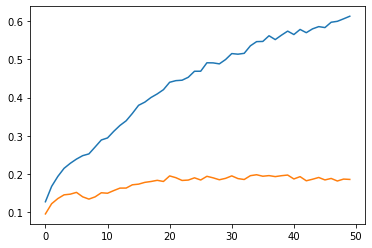

In [9]:
eval_config.n_samples = 1000

for metric_type in ['geodesic', 'proj']:
    '''
    Grassmannain Metric between two Random w
    '''
    consistency_list = []
    time_list = []
    eps = 1e-1

    for dim in range(1, 51):
        print(f'Evaluated dim {dim}')
        time.sleep(0.2)
        eval_config.subspace_dim = dim

        timer = time.time()
        consistency = evaluate_basis_consistency_local(model, eval_config, eps = eps,  metric_type = metric_type)
        consistency_list.append(consistency)
        time_list.append(round(time.time() - timer, 2))


    plt.plot(consistency_list)
    plt.savefig(f'./out/consistency/consistency_local_metric_{metric_type}_eps_{eps}_n_{eval_config.n_samples}.png')
    plt.show()
    
    with open(f'./out/consistency/consistency_local_metric_{metric_type}_eps_{eps}_n_{eval_config.n_samples}.dill', 'wb') as f:
        pickle.dump(consistency_list, f)

## Grassmannain Metric between random w and GANSpace

Evaluated dim 1


100%|██████████| 1000/1000 [00:41<00:00, 24.07it/s]


Evaluated dim 2


100%|██████████| 1000/1000 [00:41<00:00, 23.95it/s]


Evaluated dim 3


100%|██████████| 1000/1000 [00:42<00:00, 23.43it/s]


Evaluated dim 4


100%|██████████| 1000/1000 [00:43<00:00, 23.10it/s]


Evaluated dim 5


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 6


100%|██████████| 1000/1000 [00:43<00:00, 23.13it/s]


Evaluated dim 7


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 8


100%|██████████| 1000/1000 [00:43<00:00, 22.75it/s]


Evaluated dim 9


100%|██████████| 1000/1000 [00:44<00:00, 22.71it/s]


Evaluated dim 10


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 11


100%|██████████| 1000/1000 [00:44<00:00, 22.49it/s]


Evaluated dim 12


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 13


100%|██████████| 1000/1000 [00:44<00:00, 22.62it/s]


Evaluated dim 14


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 15


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 16


100%|██████████| 1000/1000 [00:42<00:00, 23.39it/s]


Evaluated dim 17


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 18


100%|██████████| 1000/1000 [00:43<00:00, 22.75it/s]


Evaluated dim 19


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 20


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 21


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 22


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 23


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 24


100%|██████████| 1000/1000 [00:45<00:00, 22.19it/s]


Evaluated dim 25


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 26


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 27


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 28


100%|██████████| 1000/1000 [00:44<00:00, 22.61it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [00:44<00:00, 22.64it/s]


Evaluated dim 30


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 31


100%|██████████| 1000/1000 [00:42<00:00, 23.45it/s]


Evaluated dim 32


100%|██████████| 1000/1000 [00:44<00:00, 22.39it/s]


Evaluated dim 33


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 34


100%|██████████| 1000/1000 [00:45<00:00, 22.12it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [00:44<00:00, 22.59it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [00:42<00:00, 23.64it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [00:44<00:00, 22.53it/s]


Evaluated dim 38


100%|██████████| 1000/1000 [00:44<00:00, 22.41it/s]


Evaluated dim 39


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 40


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 41


100%|██████████| 1000/1000 [00:44<00:00, 22.36it/s]


Evaluated dim 42


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 43


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 44


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 45


100%|██████████| 1000/1000 [00:44<00:00, 22.37it/s]


Evaluated dim 46


100%|██████████| 1000/1000 [00:43<00:00, 23.07it/s]


Evaluated dim 47


100%|██████████| 1000/1000 [00:43<00:00, 22.84it/s]


Evaluated dim 48


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 49


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 50


100%|██████████| 1000/1000 [00:44<00:00, 22.46it/s]


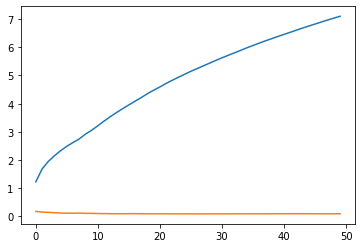

Evaluated dim 1


100%|██████████| 1000/1000 [01:11<00:00, 13.95it/s]


Evaluated dim 2


100%|██████████| 1000/1000 [01:12<00:00, 13.84it/s]


Evaluated dim 3


100%|██████████| 1000/1000 [01:08<00:00, 14.56it/s]


Evaluated dim 4


100%|██████████| 1000/1000 [01:13<00:00, 13.68it/s]


Evaluated dim 5


100%|██████████| 1000/1000 [01:11<00:00, 13.91it/s]


Evaluated dim 6


100%|██████████| 1000/1000 [01:13<00:00, 13.61it/s]


Evaluated dim 7


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 8


100%|██████████| 1000/1000 [01:09<00:00, 14.32it/s]


Evaluated dim 9


100%|██████████| 1000/1000 [01:10<00:00, 14.12it/s]


Evaluated dim 10


100%|██████████| 1000/1000 [01:11<00:00, 14.07it/s]


Evaluated dim 11


100%|██████████| 1000/1000 [01:12<00:00, 13.81it/s]


Evaluated dim 12


100%|██████████| 1000/1000 [01:15<00:00, 13.31it/s]


Evaluated dim 13


100%|██████████| 1000/1000 [01:15<00:00, 13.28it/s]


Evaluated dim 14


100%|██████████| 1000/1000 [01:11<00:00, 14.03it/s]


Evaluated dim 15


100%|██████████| 1000/1000 [01:13<00:00, 13.58it/s]


Evaluated dim 16


100%|██████████| 1000/1000 [01:12<00:00, 13.73it/s]


Evaluated dim 17


100%|██████████| 1000/1000 [01:09<00:00, 14.45it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [01:13<00:00, 13.68it/s]


Evaluated dim 19


100%|██████████| 1000/1000 [01:14<00:00, 13.43it/s]


Evaluated dim 20


100%|██████████| 1000/1000 [01:10<00:00, 14.22it/s]


Evaluated dim 21


100%|██████████| 1000/1000 [01:10<00:00, 14.14it/s]


Evaluated dim 22


100%|██████████| 1000/1000 [01:11<00:00, 14.02it/s]


Evaluated dim 23


100%|██████████| 1000/1000 [01:12<00:00, 13.72it/s]


Evaluated dim 24


100%|██████████| 1000/1000 [01:10<00:00, 14.20it/s]


Evaluated dim 25


100%|██████████| 1000/1000 [01:11<00:00, 13.98it/s]


Evaluated dim 26


100%|██████████| 1000/1000 [01:12<00:00, 13.87it/s]


Evaluated dim 27


100%|██████████| 1000/1000 [01:09<00:00, 14.38it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:13<00:00, 13.65it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [01:11<00:00, 13.93it/s]


Evaluated dim 30


100%|██████████| 1000/1000 [01:12<00:00, 13.85it/s]


Evaluated dim 31


100%|██████████| 1000/1000 [01:12<00:00, 13.72it/s]


Evaluated dim 32


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 33


100%|██████████| 1000/1000 [01:11<00:00, 13.93it/s]


Evaluated dim 34


100%|██████████| 1000/1000 [01:11<00:00, 13.94it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [01:11<00:00, 13.91it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [01:12<00:00, 13.80it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:12<00:00, 13.87it/s]


Evaluated dim 38


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 39


100%|██████████| 1000/1000 [01:10<00:00, 14.25it/s]


Evaluated dim 40


100%|██████████| 1000/1000 [01:11<00:00, 14.02it/s]


Evaluated dim 41


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 42


100%|██████████| 1000/1000 [01:12<00:00, 13.88it/s]


Evaluated dim 43


100%|██████████| 1000/1000 [01:08<00:00, 14.51it/s]


Evaluated dim 44


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 45


100%|██████████| 1000/1000 [01:08<00:00, 14.63it/s]


Evaluated dim 46


100%|██████████| 1000/1000 [01:10<00:00, 14.15it/s]


Evaluated dim 47


100%|██████████| 1000/1000 [01:11<00:00, 14.04it/s]


Evaluated dim 48


100%|██████████| 1000/1000 [01:10<00:00, 14.20it/s]


Evaluated dim 49


100%|██████████| 1000/1000 [01:09<00:00, 14.29it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [01:10<00:00, 14.09it/s]


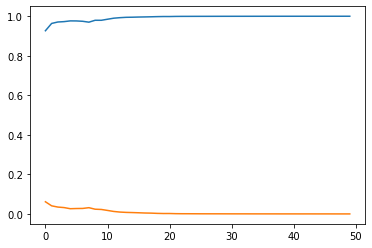

In [10]:
eval_config.n_samples = 1000
global_basis = gs_dir.squeeze().t().cpu()

for metric_type in ['geodesic', 'proj']:
    '''
    Grassmannain Metric between two Random w
    '''
    consistency_list = []
    time_list = []

    for dim in range(1, 51):
        print(f'Evaluated dim {dim}')
        time.sleep(0.2)
        eval_config.subspace_dim = dim

        timer = time.time()
        consistency = evaluate_basis_consistency_to_global(model, eval_config, global_basis,  metric_type = metric_type)
        consistency_list.append(consistency)
        time_list.append(round(time.time() - timer, 2))


    plt.plot(consistency_list)
    plt.savefig(f'./out/consistency/consistency_to_global_ganspace_metric_{metric_type}_eps_{eps}_n_{eval_config.n_samples}.png')
    plt.show()
    
    with open(f'./out/consistency/consistency_to_global_ganspace_metric_{metric_type}_n_{eval_config.n_samples}.dill', 'wb') as f:
        pickle.dump(consistency_list, f)

## Grassmannain Metric between random w and SeFa

Evaluated dim 1


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 2


100%|██████████| 1000/1000 [00:47<00:00, 21.25it/s]


Evaluated dim 3


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 4


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 5


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 6


100%|██████████| 1000/1000 [00:48<00:00, 20.82it/s]


Evaluated dim 7


100%|██████████| 1000/1000 [00:50<00:00, 19.84it/s]


Evaluated dim 8


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 9


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 10


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 11


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 12


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 13


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 14


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 15


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 16


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 17


100%|██████████| 1000/1000 [00:42<00:00, 23.35it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [00:42<00:00, 23.29it/s]


Evaluated dim 19


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 20


100%|██████████| 1000/1000 [00:44<00:00, 22.65it/s]


Evaluated dim 21


100%|██████████| 1000/1000 [00:44<00:00, 22.63it/s]


Evaluated dim 22


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 23


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 24


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 25


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 26


100%|██████████| 1000/1000 [00:43<00:00, 22.87it/s]


Evaluated dim 27


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 28


100%|██████████| 1000/1000 [00:43<00:00, 22.80it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [00:43<00:00, 23.02it/s]


Evaluated dim 30


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 31


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 32


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 33


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 34


100%|██████████| 1000/1000 [00:44<00:00, 22.62it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [00:43<00:00, 22.96it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [00:43<00:00, 22.80it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [00:43<00:00, 22.90it/s]


Evaluated dim 38


100%|██████████| 1000/1000 [00:43<00:00, 22.80it/s]


Evaluated dim 39


100%|██████████| 1000/1000 [00:43<00:00, 23.01it/s]


Evaluated dim 40


100%|██████████| 1000/1000 [00:42<00:00, 23.31it/s]


Evaluated dim 41


100%|██████████| 1000/1000 [00:43<00:00, 22.81it/s]


Evaluated dim 42


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 43


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 44


100%|██████████| 1000/1000 [00:44<00:00, 22.29it/s]


Evaluated dim 45


100%|██████████| 1000/1000 [00:44<00:00, 22.31it/s]


Evaluated dim 46


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 47


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 48


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 49


100%|██████████| 1000/1000 [00:45<00:00, 22.19it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [00:44<00:00, 22.41it/s]


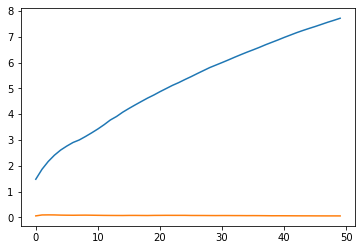

Evaluated dim 1


100%|██████████| 1000/1000 [01:13<00:00, 13.68it/s]


Evaluated dim 2


100%|██████████| 1000/1000 [01:13<00:00, 13.67it/s]


Evaluated dim 3


100%|██████████| 1000/1000 [01:13<00:00, 13.64it/s]


Evaluated dim 4


100%|██████████| 1000/1000 [01:12<00:00, 13.81it/s]


Evaluated dim 5


100%|██████████| 1000/1000 [01:13<00:00, 13.66it/s]


Evaluated dim 6


100%|██████████| 1000/1000 [01:11<00:00, 13.94it/s]


Evaluated dim 7


100%|██████████| 1000/1000 [01:12<00:00, 13.72it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [01:13<00:00, 13.52it/s]


Evaluated dim 9


100%|██████████| 1000/1000 [01:14<00:00, 13.43it/s]


Evaluated dim 10


100%|██████████| 1000/1000 [01:14<00:00, 13.50it/s]


Evaluated dim 11


100%|██████████| 1000/1000 [01:14<00:00, 13.48it/s]


Evaluated dim 12


100%|██████████| 1000/1000 [01:13<00:00, 13.59it/s]


Evaluated dim 13


100%|██████████| 1000/1000 [01:12<00:00, 13.81it/s]


Evaluated dim 14


100%|██████████| 1000/1000 [01:13<00:00, 13.66it/s]


Evaluated dim 15


100%|██████████| 1000/1000 [01:13<00:00, 13.68it/s]


Evaluated dim 16


100%|██████████| 1000/1000 [01:13<00:00, 13.55it/s]


Evaluated dim 17


100%|██████████| 1000/1000 [01:14<00:00, 13.43it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [01:14<00:00, 13.37it/s]


Evaluated dim 19


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 20


100%|██████████| 1000/1000 [01:13<00:00, 13.68it/s]


Evaluated dim 21


100%|██████████| 1000/1000 [01:12<00:00, 13.77it/s]


Evaluated dim 22


100%|██████████| 1000/1000 [01:14<00:00, 13.45it/s]


Evaluated dim 23


100%|██████████| 1000/1000 [01:12<00:00, 13.82it/s]


Evaluated dim 24


100%|██████████| 1000/1000 [01:12<00:00, 13.80it/s]


Evaluated dim 25


100%|██████████| 1000/1000 [01:11<00:00, 13.95it/s]


Evaluated dim 26


100%|██████████| 1000/1000 [01:13<00:00, 13.64it/s]


Evaluated dim 27


100%|██████████| 1000/1000 [01:10<00:00, 14.14it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:11<00:00, 14.01it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [01:10<00:00, 14.13it/s]


Evaluated dim 30


100%|██████████| 1000/1000 [01:12<00:00, 13.85it/s]


Evaluated dim 31


100%|██████████| 1000/1000 [01:12<00:00, 13.72it/s]


Evaluated dim 32


100%|██████████| 1000/1000 [01:12<00:00, 13.84it/s]


Evaluated dim 33


100%|██████████| 1000/1000 [01:12<00:00, 13.87it/s]


Evaluated dim 34


100%|██████████| 1000/1000 [01:10<00:00, 14.14it/s]


Evaluated dim 35


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 36


100%|██████████| 1000/1000 [01:11<00:00, 13.91it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:12<00:00, 13.85it/s]


Evaluated dim 38


100%|██████████| 1000/1000 [01:11<00:00, 13.90it/s]


Evaluated dim 39


100%|██████████| 1000/1000 [01:12<00:00, 13.71it/s]


Evaluated dim 40


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 41


100%|██████████| 1000/1000 [01:12<00:00, 13.79it/s]


Evaluated dim 42


100%|██████████| 1000/1000 [01:12<00:00, 13.82it/s]


Evaluated dim 43


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 44


100%|██████████| 1000/1000 [01:13<00:00, 13.57it/s]


Evaluated dim 45


100%|██████████| 1000/1000 [01:13<00:00, 13.61it/s]


Evaluated dim 46


100%|██████████| 1000/1000 [01:11<00:00, 14.03it/s]


Evaluated dim 47


100%|██████████| 1000/1000 [01:11<00:00, 14.08it/s]


Evaluated dim 48


100%|██████████| 1000/1000 [01:13<00:00, 13.61it/s]


Evaluated dim 49


100%|██████████| 1000/1000 [01:10<00:00, 14.11it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [01:13<00:00, 13.66it/s]


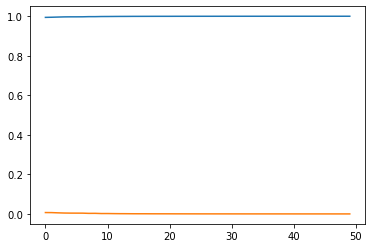

In [11]:
eval_config.n_samples = 1000
global_basis = sf_dir.squeeze().t().cpu()

for metric_type in ['geodesic', 'proj']:
    '''
    Grassmannain Metric between two Random w
    '''
    consistency_list = []
    time_list = []
    
    for dim in range(1, 51):
        print(f'Evaluated dim {dim}')
        time.sleep(0.2)
        eval_config.subspace_dim = dim

        timer = time.time()
        consistency = evaluate_basis_consistency_to_global(model, eval_config, global_basis,  metric_type = metric_type)
        consistency_list.append(consistency)
        time_list.append(round(time.time() - timer, 2))
        

    plt.plot(consistency_list)
    plt.savefig(f'./out/consistency/consistency_to_global_sefa_metric_{metric_type}_eps_{eps}_n_{eval_config.n_samples}.png')
    plt.show()
    
    with open(f'./out/consistency/consistency_to_global_sefa_metric_{metric_type}_n_{eval_config.n_samples}.dill', 'wb') as f:
        pickle.dump(consistency_list, f)

## Ablation study for eps in Close W

Evaluated dim 1


100%|██████████| 1000/1000 [01:27<00:00, 11.44it/s]


Evaluated dim 2


100%|██████████| 1000/1000 [01:24<00:00, 11.77it/s]


Evaluated dim 3


100%|██████████| 1000/1000 [01:23<00:00, 11.95it/s]


Evaluated dim 4


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 5


100%|██████████| 1000/1000 [01:26<00:00, 11.55it/s]


Evaluated dim 6


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 7


100%|██████████| 1000/1000 [01:26<00:00, 11.61it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [01:24<00:00, 11.81it/s]


Evaluated dim 9


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 10


100%|██████████| 1000/1000 [01:23<00:00, 11.95it/s]


Evaluated dim 11


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 12


100%|██████████| 1000/1000 [01:24<00:00, 11.81it/s]


Evaluated dim 13


100%|██████████| 1000/1000 [01:23<00:00, 12.00it/s]


Evaluated dim 14


100%|██████████| 1000/1000 [01:25<00:00, 11.65it/s]


Evaluated dim 15


100%|██████████| 1000/1000 [01:25<00:00, 11.70it/s]


Evaluated dim 16


100%|██████████| 1000/1000 [01:27<00:00, 11.41it/s]


Evaluated dim 17


100%|██████████| 1000/1000 [01:24<00:00, 11.86it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [01:25<00:00, 11.76it/s]


Evaluated dim 19


100%|██████████| 1000/1000 [01:23<00:00, 11.93it/s]


Evaluated dim 20


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 21


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 22


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 23


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 24


100%|██████████| 1000/1000 [01:27<00:00, 11.39it/s]


Evaluated dim 25


100%|██████████| 1000/1000 [01:26<00:00, 11.59it/s]


Evaluated dim 26


100%|██████████| 1000/1000 [01:24<00:00, 11.77it/s]


Evaluated dim 27


100%|██████████| 1000/1000 [01:24<00:00, 11.84it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:25<00:00, 11.69it/s]


Evaluated dim 29


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 30


100%|██████████| 1000/1000 [01:26<00:00, 11.60it/s]


Evaluated dim 31


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 32


100%|██████████| 1000/1000 [01:27<00:00, 11.45it/s]


Evaluated dim 33


100%|██████████| 1000/1000 [01:26<00:00, 11.62it/s]


Evaluated dim 34


100%|██████████| 1000/1000 [01:26<00:00, 11.61it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [01:23<00:00, 11.91it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [01:26<00:00, 11.51it/s]


Evaluated dim 37


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 38


100%|██████████| 1000/1000 [01:26<00:00, 11.55it/s]


Evaluated dim 39


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 40


100%|██████████| 1000/1000 [01:25<00:00, 11.73it/s]


Evaluated dim 41


100%|██████████| 1000/1000 [01:25<00:00, 11.64it/s]


Evaluated dim 42


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 43


100%|██████████| 1000/1000 [01:25<00:00, 11.69it/s]


Evaluated dim 44


100%|██████████| 1000/1000 [01:25<00:00, 11.70it/s]


Evaluated dim 45


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 46


100%|██████████| 1000/1000 [01:25<00:00, 11.65it/s]


Evaluated dim 47


100%|██████████| 1000/1000 [01:24<00:00, 11.81it/s]


Evaluated dim 48


100%|██████████| 1000/1000 [01:26<00:00, 11.52it/s]


Evaluated dim 49


100%|██████████| 1000/1000 [01:26<00:00, 11.54it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [01:25<00:00, 11.66it/s]


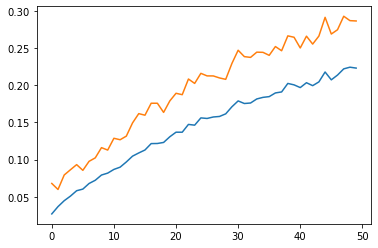

Evaluated dim 1


100%|██████████| 1000/1000 [01:24<00:00, 11.78it/s]


Evaluated dim 2


100%|██████████| 1000/1000 [01:25<00:00, 11.72it/s]


Evaluated dim 3


100%|██████████| 1000/1000 [01:24<00:00, 11.77it/s]


Evaluated dim 4


100%|██████████| 1000/1000 [01:26<00:00, 11.60it/s]


Evaluated dim 5


100%|██████████| 1000/1000 [01:25<00:00, 11.73it/s]


Evaluated dim 6


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 7


100%|██████████| 1000/1000 [01:25<00:00, 11.72it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [01:25<00:00, 11.71it/s]


Evaluated dim 9


100%|██████████| 1000/1000 [01:25<00:00, 11.71it/s]


Evaluated dim 10


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 11


100%|██████████| 1000/1000 [01:25<00:00, 11.67it/s]


Evaluated dim 12


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 13


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 14


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 15


100%|██████████| 1000/1000 [01:25<00:00, 11.66it/s]


Evaluated dim 16


100%|██████████| 1000/1000 [01:26<00:00, 11.60it/s]


Evaluated dim 17


100%|██████████| 1000/1000 [01:26<00:00, 11.61it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [01:25<00:00, 11.72it/s]


Evaluated dim 19


100%|██████████| 1000/1000 [01:25<00:00, 11.66it/s]


Evaluated dim 20


100%|██████████| 1000/1000 [01:25<00:00, 11.75it/s]


Evaluated dim 21


100%|██████████| 1000/1000 [01:22<00:00, 12.08it/s]


Evaluated dim 22


100%|██████████| 1000/1000 [01:26<00:00, 11.60it/s]


Evaluated dim 23


100%|██████████| 1000/1000 [01:21<00:00, 12.26it/s]


Evaluated dim 24


100%|██████████| 1000/1000 [01:24<00:00, 11.78it/s]


Evaluated dim 25


100%|██████████| 1000/1000 [01:23<00:00, 11.99it/s]


Evaluated dim 26


100%|██████████| 1000/1000 [01:25<00:00, 11.73it/s]


Evaluated dim 27


100%|██████████| 1000/1000 [01:26<00:00, 11.59it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:25<00:00, 11.68it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [01:23<00:00, 11.93it/s]


Evaluated dim 30


100%|██████████| 1000/1000 [01:22<00:00, 12.07it/s]


Evaluated dim 31


100%|██████████| 1000/1000 [01:23<00:00, 11.92it/s]


Evaluated dim 32


100%|██████████| 1000/1000 [01:25<00:00, 11.74it/s]


Evaluated dim 33


100%|██████████| 1000/1000 [01:25<00:00, 11.76it/s]


Evaluated dim 34


100%|██████████| 1000/1000 [01:26<00:00, 11.58it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [01:25<00:00, 11.75it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [01:24<00:00, 11.83it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:28<00:00, 11.32it/s]


Evaluated dim 38


100%|██████████| 1000/1000 [01:22<00:00, 12.05it/s]


Evaluated dim 39


100%|██████████| 1000/1000 [01:26<00:00, 11.61it/s]


Evaluated dim 40


100%|██████████| 1000/1000 [01:26<00:00, 11.59it/s]


Evaluated dim 41


100%|██████████| 1000/1000 [01:26<00:00, 11.50it/s]


Evaluated dim 42


100%|██████████| 1000/1000 [01:26<00:00, 11.50it/s]


Evaluated dim 43


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 44


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 45


100%|██████████| 1000/1000 [01:26<00:00, 11.50it/s]


Evaluated dim 46


100%|██████████| 1000/1000 [01:26<00:00, 11.59it/s]


Evaluated dim 47


100%|██████████| 1000/1000 [01:26<00:00, 11.56it/s]


Evaluated dim 48


100%|██████████| 1000/1000 [01:23<00:00, 11.95it/s]


Evaluated dim 49


100%|██████████| 1000/1000 [01:27<00:00, 11.42it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [01:27<00:00, 11.38it/s]


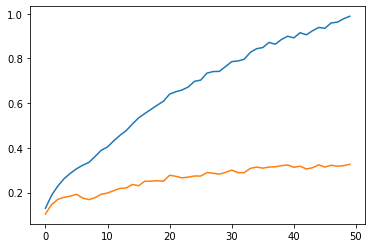

Evaluated dim 1


100%|██████████| 1000/1000 [01:26<00:00, 11.53it/s]


Evaluated dim 2


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 3


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 4


100%|██████████| 1000/1000 [01:25<00:00, 11.75it/s]


Evaluated dim 5


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 6


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 7


100%|██████████| 1000/1000 [01:26<00:00, 11.61it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [01:24<00:00, 11.77it/s]


Evaluated dim 9


100%|██████████| 1000/1000 [01:26<00:00, 11.57it/s]


Evaluated dim 10


100%|██████████| 1000/1000 [01:25<00:00, 11.73it/s]


Evaluated dim 11


100%|██████████| 1000/1000 [01:26<00:00, 11.57it/s]


Evaluated dim 12


100%|██████████| 1000/1000 [01:25<00:00, 11.75it/s]


Evaluated dim 13


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 14


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 15


100%|██████████| 1000/1000 [01:23<00:00, 11.96it/s]


Evaluated dim 16


100%|██████████| 1000/1000 [01:24<00:00, 11.79it/s]


Evaluated dim 17


100%|██████████| 1000/1000 [01:23<00:00, 11.96it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [01:24<00:00, 11.88it/s]


Evaluated dim 19


100%|██████████| 1000/1000 [01:26<00:00, 11.54it/s]


Evaluated dim 20


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 21


100%|██████████| 1000/1000 [01:25<00:00, 11.74it/s]


Evaluated dim 22


100%|██████████| 1000/1000 [01:26<00:00, 11.56it/s]


Evaluated dim 23


100%|██████████| 1000/1000 [01:25<00:00, 11.75it/s]


Evaluated dim 24


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 25


100%|██████████| 1000/1000 [01:21<00:00, 12.31it/s]


Evaluated dim 26


100%|██████████| 1000/1000 [01:24<00:00, 11.90it/s]


Evaluated dim 27


100%|██████████| 1000/1000 [01:28<00:00, 11.27it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:27<00:00, 11.37it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [01:27<00:00, 11.41it/s]


Evaluated dim 30


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 31


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 32


100%|██████████| 1000/1000 [01:25<00:00, 11.72it/s]


Evaluated dim 33


100%|██████████| 1000/1000 [01:25<00:00, 11.69it/s]


Evaluated dim 34


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 35


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 36


100%|██████████| 1000/1000 [01:25<00:00, 11.63it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:26<00:00, 11.61it/s]


Evaluated dim 38


100%|██████████| 1000/1000 [01:27<00:00, 11.49it/s]


Evaluated dim 39


100%|██████████| 1000/1000 [01:26<00:00, 11.52it/s]


Evaluated dim 40


100%|██████████| 1000/1000 [01:28<00:00, 11.36it/s]


Evaluated dim 41


100%|██████████| 1000/1000 [01:27<00:00, 11.47it/s]


Evaluated dim 42


100%|██████████| 1000/1000 [01:26<00:00, 11.59it/s]


Evaluated dim 43


100%|██████████| 1000/1000 [01:25<00:00, 11.69it/s]


Evaluated dim 44


100%|██████████| 1000/1000 [01:27<00:00, 11.38it/s]


Evaluated dim 45


100%|██████████| 1000/1000 [01:26<00:00, 11.58it/s]


Evaluated dim 46


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 47


100%|██████████| 1000/1000 [01:27<00:00, 11.43it/s]


Evaluated dim 48


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 49


100%|██████████| 1000/1000 [01:26<00:00, 11.51it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [01:26<00:00, 11.56it/s]


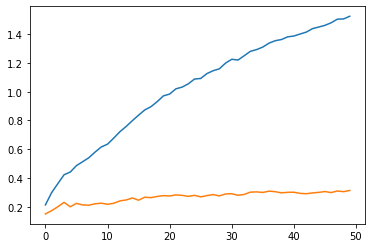

Evaluated dim 1


100%|██████████| 1000/1000 [01:26<00:00, 11.59it/s]


Evaluated dim 2


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 3


100%|██████████| 1000/1000 [01:24<00:00, 11.89it/s]


Evaluated dim 4


100%|██████████| 1000/1000 [01:25<00:00, 11.71it/s]


Evaluated dim 5


100%|██████████| 1000/1000 [01:26<00:00, 11.50it/s]


Evaluated dim 6


100%|██████████| 1000/1000 [01:25<00:00, 11.63it/s]


Evaluated dim 7


100%|██████████| 1000/1000 [01:25<00:00, 11.65it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [01:24<00:00, 11.80it/s]


Evaluated dim 9


100%|██████████| 1000/1000 [01:26<00:00, 11.58it/s]


Evaluated dim 10


100%|██████████| 1000/1000 [01:26<00:00, 11.60it/s]


Evaluated dim 11


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 12


100%|██████████| 1000/1000 [01:25<00:00, 11.75it/s]


Evaluated dim 13


100%|██████████| 1000/1000 [01:25<00:00, 11.64it/s]


Evaluated dim 14


100%|██████████| 1000/1000 [01:24<00:00, 11.82it/s]


Evaluated dim 15


100%|██████████| 1000/1000 [01:26<00:00, 11.53it/s]


Evaluated dim 16


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 17


100%|██████████| 1000/1000 [01:24<00:00, 11.79it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [01:26<00:00, 11.53it/s]


Evaluated dim 19


100%|██████████| 1000/1000 [01:27<00:00, 11.40it/s]


Evaluated dim 20


100%|██████████| 1000/1000 [01:25<00:00, 11.63it/s]


Evaluated dim 21


100%|██████████| 1000/1000 [01:28<00:00, 11.36it/s]


Evaluated dim 22


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 23


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 24


100%|██████████| 1000/1000 [01:26<00:00, 11.53it/s]


Evaluated dim 25


100%|██████████| 1000/1000 [01:23<00:00, 11.91it/s]


Evaluated dim 26


100%|██████████| 1000/1000 [01:25<00:00, 11.71it/s]


Evaluated dim 27


100%|██████████| 1000/1000 [01:26<00:00, 11.59it/s]


Evaluated dim 28


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 29


100%|██████████| 1000/1000 [01:28<00:00, 11.35it/s]


Evaluated dim 30


100%|██████████| 1000/1000 [01:29<00:00, 11.16it/s]


Evaluated dim 31


100%|██████████| 1000/1000 [01:27<00:00, 11.48it/s]


Evaluated dim 32


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 33


100%|██████████| 1000/1000 [01:25<00:00, 11.65it/s]


Evaluated dim 34


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 35


100%|██████████| 1000/1000 [01:26<00:00, 11.60it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [01:26<00:00, 11.53it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:26<00:00, 11.51it/s]


Evaluated dim 38


100%|██████████| 1000/1000 [01:25<00:00, 11.64it/s]


Evaluated dim 39


100%|██████████| 1000/1000 [01:26<00:00, 11.61it/s]


Evaluated dim 40


100%|██████████| 1000/1000 [01:26<00:00, 11.54it/s]


Evaluated dim 41


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 42


100%|██████████| 1000/1000 [01:25<00:00, 11.64it/s]


Evaluated dim 43


100%|██████████| 1000/1000 [01:26<00:00, 11.56it/s]


Evaluated dim 44


100%|██████████| 1000/1000 [01:26<00:00, 11.51it/s]


Evaluated dim 45


100%|██████████| 1000/1000 [01:26<00:00, 11.51it/s]


Evaluated dim 46


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 47


100%|██████████| 1000/1000 [01:26<00:00, 11.56it/s]


Evaluated dim 48


100%|██████████| 1000/1000 [01:26<00:00, 11.58it/s]


Evaluated dim 49


100%|██████████| 1000/1000 [01:25<00:00, 11.63it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [01:24<00:00, 11.87it/s]


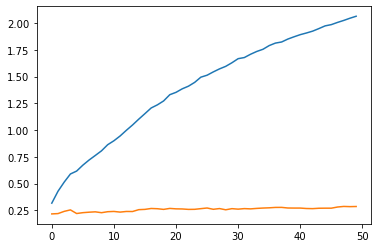

Evaluated dim 1


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 2


100%|██████████| 1000/1000 [01:53<00:00,  8.77it/s]


Evaluated dim 3


100%|██████████| 1000/1000 [01:53<00:00,  8.81it/s]


Evaluated dim 4


100%|██████████| 1000/1000 [01:55<00:00,  8.68it/s]


Evaluated dim 5


100%|██████████| 1000/1000 [01:54<00:00,  8.74it/s]


Evaluated dim 6


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 7


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [01:54<00:00,  8.76it/s]


Evaluated dim 9


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 10


100%|██████████| 1000/1000 [01:54<00:00,  8.73it/s]


Evaluated dim 11


100%|██████████| 1000/1000 [01:54<00:00,  8.76it/s]


Evaluated dim 12


100%|██████████| 1000/1000 [01:53<00:00,  8.79it/s]


Evaluated dim 13


100%|██████████| 1000/1000 [01:54<00:00,  8.75it/s]


Evaluated dim 14


100%|██████████| 1000/1000 [01:54<00:00,  8.73it/s]


Evaluated dim 15


100%|██████████| 1000/1000 [01:55<00:00,  8.68it/s]


Evaluated dim 16


100%|██████████| 1000/1000 [01:54<00:00,  8.71it/s]


Evaluated dim 17


100%|██████████| 1000/1000 [01:53<00:00,  8.80it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [01:52<00:00,  8.87it/s]


Evaluated dim 19


100%|██████████| 1000/1000 [01:54<00:00,  8.72it/s]


Evaluated dim 20


100%|██████████| 1000/1000 [01:55<00:00,  8.65it/s]


Evaluated dim 21


100%|██████████| 1000/1000 [01:54<00:00,  8.77it/s]


Evaluated dim 22


100%|██████████| 1000/1000 [01:54<00:00,  8.74it/s]


Evaluated dim 23


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 24


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 25


100%|██████████| 1000/1000 [01:52<00:00,  8.86it/s]


Evaluated dim 26


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 27


100%|██████████| 1000/1000 [01:54<00:00,  8.74it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:52<00:00,  8.88it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [01:54<00:00,  8.72it/s]


Evaluated dim 30


100%|██████████| 1000/1000 [01:55<00:00,  8.68it/s]


Evaluated dim 31


100%|██████████| 1000/1000 [01:55<00:00,  8.66it/s]


Evaluated dim 32


100%|██████████| 1000/1000 [01:52<00:00,  8.85it/s]


Evaluated dim 33


100%|██████████| 1000/1000 [01:50<00:00,  9.09it/s]


Evaluated dim 34


100%|██████████| 1000/1000 [01:49<00:00,  9.13it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [01:51<00:00,  8.99it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [01:52<00:00,  8.87it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:52<00:00,  8.91it/s]


Evaluated dim 38


100%|██████████| 1000/1000 [01:53<00:00,  8.81it/s]


Evaluated dim 39


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 40


100%|██████████| 1000/1000 [01:54<00:00,  8.76it/s]


Evaluated dim 41


100%|██████████| 1000/1000 [01:52<00:00,  8.86it/s]


Evaluated dim 42


100%|██████████| 1000/1000 [01:54<00:00,  8.72it/s]


Evaluated dim 43


100%|██████████| 1000/1000 [01:53<00:00,  8.81it/s]


Evaluated dim 44


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 45


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 46


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 47


100%|██████████| 1000/1000 [01:55<00:00,  8.67it/s]


Evaluated dim 48


100%|██████████| 1000/1000 [01:55<00:00,  8.68it/s]


Evaluated dim 49


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 50


100%|██████████| 1000/1000 [01:54<00:00,  8.70it/s]


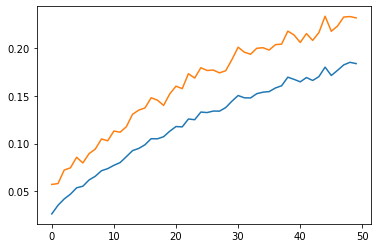

Evaluated dim 1


100%|██████████| 1000/1000 [01:54<00:00,  8.74it/s]


Evaluated dim 2


100%|██████████| 1000/1000 [01:55<00:00,  8.67it/s]


Evaluated dim 3


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 4


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 5


100%|██████████| 1000/1000 [01:54<00:00,  8.72it/s]


Evaluated dim 6


100%|██████████| 1000/1000 [01:54<00:00,  8.71it/s]


Evaluated dim 7


100%|██████████| 1000/1000 [01:51<00:00,  8.96it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [01:54<00:00,  8.75it/s]


Evaluated dim 9


100%|██████████| 1000/1000 [01:53<00:00,  8.80it/s]


Evaluated dim 10


100%|██████████| 1000/1000 [01:55<00:00,  8.66it/s]


Evaluated dim 11


100%|██████████| 1000/1000 [01:52<00:00,  8.92it/s]


Evaluated dim 12


100%|██████████| 1000/1000 [01:51<00:00,  8.96it/s]


Evaluated dim 13


100%|██████████| 1000/1000 [01:54<00:00,  8.70it/s]


Evaluated dim 14


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 15


100%|██████████| 1000/1000 [01:54<00:00,  8.76it/s]


Evaluated dim 16


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 17


100%|██████████| 1000/1000 [01:50<00:00,  9.05it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [01:53<00:00,  8.80it/s]


Evaluated dim 19


100%|██████████| 1000/1000 [01:52<00:00,  8.92it/s]


Evaluated dim 20


100%|██████████| 1000/1000 [01:53<00:00,  8.83it/s]


Evaluated dim 21


100%|██████████| 1000/1000 [01:53<00:00,  8.79it/s]


Evaluated dim 22


100%|██████████| 1000/1000 [01:53<00:00,  8.81it/s]


Evaluated dim 23


100%|██████████| 1000/1000 [01:53<00:00,  8.85it/s]


Evaluated dim 24


100%|██████████| 1000/1000 [01:53<00:00,  8.79it/s]


Evaluated dim 25


100%|██████████| 1000/1000 [01:52<00:00,  8.92it/s]


Evaluated dim 26


100%|██████████| 1000/1000 [01:54<00:00,  8.71it/s]


Evaluated dim 27


100%|██████████| 1000/1000 [01:54<00:00,  8.73it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:54<00:00,  8.75it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [01:52<00:00,  8.91it/s]


Evaluated dim 30


100%|██████████| 1000/1000 [01:55<00:00,  8.69it/s]


Evaluated dim 31


100%|██████████| 1000/1000 [01:54<00:00,  8.71it/s]


Evaluated dim 32


100%|██████████| 1000/1000 [01:53<00:00,  8.77it/s]


Evaluated dim 33


100%|██████████| 1000/1000 [01:52<00:00,  8.86it/s]


Evaluated dim 34


100%|██████████| 1000/1000 [01:52<00:00,  8.89it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [01:53<00:00,  8.80it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [01:54<00:00,  8.70it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:55<00:00,  8.67it/s]


Evaluated dim 38


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 39


100%|██████████| 1000/1000 [01:52<00:00,  8.87it/s]


Evaluated dim 40


100%|██████████| 1000/1000 [01:50<00:00,  9.03it/s]


Evaluated dim 41


100%|██████████| 1000/1000 [01:54<00:00,  8.76it/s]


Evaluated dim 42


100%|██████████| 1000/1000 [01:52<00:00,  8.87it/s]


Evaluated dim 43


100%|██████████| 1000/1000 [01:52<00:00,  8.92it/s]


Evaluated dim 44


100%|██████████| 1000/1000 [01:53<00:00,  8.79it/s]


Evaluated dim 45


100%|██████████| 1000/1000 [01:53<00:00,  8.79it/s]


Evaluated dim 46


100%|██████████| 1000/1000 [01:53<00:00,  8.82it/s]


Evaluated dim 47


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 48


100%|██████████| 1000/1000 [01:52<00:00,  8.86it/s]


Evaluated dim 49


100%|██████████| 1000/1000 [01:52<00:00,  8.91it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [01:53<00:00,  8.80it/s]


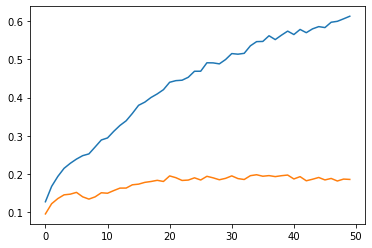

Evaluated dim 1


100%|██████████| 1000/1000 [01:53<00:00,  8.82it/s]


Evaluated dim 2


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 3


100%|██████████| 1000/1000 [01:54<00:00,  8.71it/s]


Evaluated dim 4


100%|██████████| 1000/1000 [01:55<00:00,  8.64it/s]


Evaluated dim 5


100%|██████████| 1000/1000 [01:55<00:00,  8.67it/s]


Evaluated dim 6


100%|██████████| 1000/1000 [01:53<00:00,  8.77it/s]


Evaluated dim 7


100%|██████████| 1000/1000 [01:54<00:00,  8.71it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [01:51<00:00,  8.98it/s]


Evaluated dim 9


100%|██████████| 1000/1000 [01:55<00:00,  8.66it/s]


Evaluated dim 10


100%|██████████| 1000/1000 [01:54<00:00,  8.75it/s]


Evaluated dim 11


100%|██████████| 1000/1000 [01:54<00:00,  8.74it/s]


Evaluated dim 12


100%|██████████| 1000/1000 [01:54<00:00,  8.72it/s]


Evaluated dim 13


100%|██████████| 1000/1000 [01:53<00:00,  8.81it/s]


Evaluated dim 14


100%|██████████| 1000/1000 [01:52<00:00,  8.93it/s]


Evaluated dim 15


100%|██████████| 1000/1000 [01:50<00:00,  9.04it/s]


Evaluated dim 16


100%|██████████| 1000/1000 [01:51<00:00,  8.97it/s]


Evaluated dim 17


100%|██████████| 1000/1000 [01:50<00:00,  9.03it/s]


Evaluated dim 18


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 19


100%|██████████| 1000/1000 [01:58<00:00,  8.41it/s]


Evaluated dim 20


100%|██████████| 1000/1000 [01:59<00:00,  8.39it/s]


Evaluated dim 21


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 22


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 23


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 24


100%|██████████| 1000/1000 [02:03<00:00,  8.09it/s]


Evaluated dim 25


100%|██████████| 1000/1000 [02:06<00:00,  7.90it/s]


Evaluated dim 26


100%|██████████| 1000/1000 [02:00<00:00,  8.28it/s]


Evaluated dim 27


100%|██████████| 1000/1000 [02:00<00:00,  8.33it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:58<00:00,  8.41it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [01:59<00:00,  8.40it/s]


Evaluated dim 30


100%|██████████| 1000/1000 [01:56<00:00,  8.57it/s]


Evaluated dim 31


100%|██████████| 1000/1000 [01:58<00:00,  8.46it/s]


Evaluated dim 32


100%|██████████| 1000/1000 [01:56<00:00,  8.57it/s]


Evaluated dim 33


100%|██████████| 1000/1000 [01:54<00:00,  8.73it/s]


Evaluated dim 34


100%|██████████| 1000/1000 [01:55<00:00,  8.69it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [01:56<00:00,  8.59it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [01:54<00:00,  8.74it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:54<00:00,  8.76it/s]


Evaluated dim 38


100%|██████████| 1000/1000 [01:49<00:00,  9.12it/s]


Evaluated dim 39


100%|██████████| 1000/1000 [01:54<00:00,  8.77it/s]


Evaluated dim 40


100%|██████████| 1000/1000 [01:54<00:00,  8.70it/s]


Evaluated dim 41


100%|██████████| 1000/1000 [01:52<00:00,  8.92it/s]


Evaluated dim 42


100%|██████████| 1000/1000 [01:52<00:00,  8.92it/s]


Evaluated dim 43


100%|██████████| 1000/1000 [01:50<00:00,  9.03it/s]


Evaluated dim 44


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 45


100%|██████████| 1000/1000 [01:54<00:00,  8.77it/s]


Evaluated dim 46


100%|██████████| 1000/1000 [01:57<00:00,  8.53it/s]


Evaluated dim 47


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 48


100%|██████████| 1000/1000 [01:58<00:00,  8.43it/s]


Evaluated dim 49


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 50


100%|██████████| 1000/1000 [01:55<00:00,  8.65it/s]


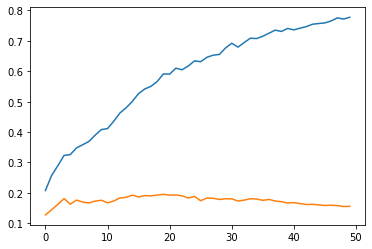

Evaluated dim 1


100%|██████████| 1000/1000 [01:55<00:00,  8.66it/s]


Evaluated dim 2


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 3


100%|██████████| 1000/1000 [02:00<00:00,  8.33it/s]


Evaluated dim 4


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 5


100%|██████████| 1000/1000 [01:57<00:00,  8.48it/s]


Evaluated dim 6


100%|██████████| 1000/1000 [02:02<00:00,  8.19it/s]


Evaluated dim 7


100%|██████████| 1000/1000 [01:57<00:00,  8.52it/s]


Evaluated dim 8


100%|██████████| 1000/1000 [02:00<00:00,  8.30it/s]


Evaluated dim 9


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 10


100%|██████████| 1000/1000 [01:58<00:00,  8.44it/s]


Evaluated dim 11


100%|██████████| 1000/1000 [01:57<00:00,  8.54it/s]


Evaluated dim 12


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 13


100%|██████████| 1000/1000 [02:04<00:00,  8.00it/s]


Evaluated dim 14


100%|██████████| 1000/1000 [02:07<00:00,  7.85it/s]


Evaluated dim 15


100%|██████████| 1000/1000 [02:04<00:00,  8.04it/s]


Evaluated dim 16


100%|██████████| 1000/1000 [01:59<00:00,  8.34it/s]


Evaluated dim 17


100%|██████████| 1000/1000 [01:58<00:00,  8.44it/s]


Evaluated dim 18


100%|██████████| 1000/1000 [02:00<00:00,  8.30it/s]


Evaluated dim 19


100%|██████████| 1000/1000 [01:58<00:00,  8.45it/s]


Evaluated dim 20


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 21


100%|██████████| 1000/1000 [01:56<00:00,  8.58it/s]


Evaluated dim 22


100%|██████████| 1000/1000 [01:55<00:00,  8.62it/s]


Evaluated dim 23


100%|██████████| 1000/1000 [01:53<00:00,  8.82it/s]


Evaluated dim 24


100%|██████████| 1000/1000 [01:50<00:00,  9.03it/s]


Evaluated dim 25


100%|██████████| 1000/1000 [01:52<00:00,  8.90it/s]


Evaluated dim 26


100%|██████████| 1000/1000 [01:53<00:00,  8.81it/s]


Evaluated dim 27


100%|██████████| 1000/1000 [01:52<00:00,  8.87it/s]


Evaluated dim 28


100%|██████████| 1000/1000 [01:55<00:00,  8.68it/s]


Evaluated dim 29


100%|██████████| 1000/1000 [01:55<00:00,  8.68it/s]


Evaluated dim 30


100%|██████████| 1000/1000 [01:58<00:00,  8.46it/s]


Evaluated dim 31


100%|██████████| 1000/1000 [01:57<00:00,  8.53it/s]


Evaluated dim 32


100%|██████████| 1000/1000 [01:55<00:00,  8.68it/s]


Evaluated dim 33


100%|██████████| 1000/1000 [01:52<00:00,  8.89it/s]


Evaluated dim 34


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 35


100%|██████████| 1000/1000 [01:54<00:00,  8.73it/s]


Evaluated dim 36


100%|██████████| 1000/1000 [01:54<00:00,  8.77it/s]


Evaluated dim 37


100%|██████████| 1000/1000 [01:52<00:00,  8.86it/s]


Evaluated dim 38


100%|██████████| 1000/1000 [01:53<00:00,  8.80it/s]


Evaluated dim 39


100%|██████████| 1000/1000 [01:54<00:00,  8.72it/s]


Evaluated dim 40


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 41


100%|██████████| 1000/1000 [01:54<00:00,  8.76it/s]


Evaluated dim 42


100%|██████████| 1000/1000 [01:54<00:00,  8.75it/s]


Evaluated dim 43


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


Evaluated dim 44


  0%|          | 0/1000 [00:00<?, ?it/s]

Evaluated dim 45


100%|██████████| 1000/1000 [01:54<00:00,  8.73it/s]


Evaluated dim 46


100%|██████████| 1000/1000 [01:52<00:00,  8.86it/s]


Evaluated dim 47


100%|██████████| 1000/1000 [01:52<00:00,  8.89it/s]


Evaluated dim 48


100%|██████████| 1000/1000 [01:51<00:00,  8.94it/s]


Evaluated dim 49


100%|██████████| 1000/1000 [01:53<00:00,  8.84it/s]


Evaluated dim 50


100%|██████████| 1000/1000 [01:53<00:00,  8.79it/s]


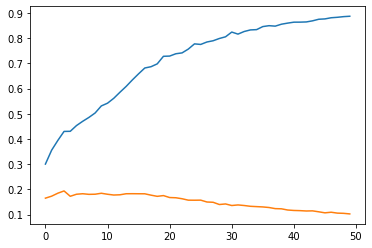

In [12]:
import pickle
eval_config.n_samples = 1000

for metric_type in ['geodesic', 'proj']:
    for eps in [1e-2, 1e-1, 0.25, 5e-1]:
        consistency_list = []
        time_list = []

        for dim in range(1, 51):
            print(f'Evaluated dim {dim}')
            time.sleep(0.3)
            eval_config.subspace_dim = dim

            timer = time.time()
            consistency = evaluate_basis_consistency_local(model, eval_config, eps = eps,  metric_type = metric_type)
            consistency_list.append(consistency)
            time_list.append(round(time.time() - timer, 2))


        plt.plot(consistency_list)
        plt.savefig(f'./out/consistency/consistency_local_metric_{metric_type}_eps_{eps}_n_{eval_config.n_samples}.png')
        plt.show()

        with open(f'./out/consistency/consistency_local_metric_{metric_type}_eps_{eps}_n_{eval_config.n_samples}.dill', 'wb') as f:
            pickle.dump(consistency_list, f)
    